In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPooling2D,GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.preprocessing import image
from google.colab import files

Using TensorFlow backend.


In [19]:
uploaded = files.upload()

KeyboardInterrupt: ignored

In [0]:
test = pd.read_csv('fashion-mnist_test.csv')
train = pd.read_csv('fashion-mnist_train.csv')

In [0]:
X_train = (train.iloc[:,1:].values).astype('float32')
Y_train = (train.iloc[:,0].values).astype('int32')
X_test = (test.iloc[:,1:].values).astype('float32')
Y_test = (test.iloc[:,0].values).astype('int32')

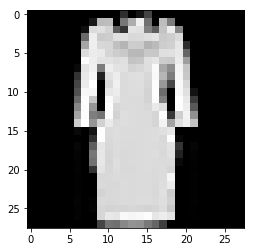

In [4]:
X_train = X_train.reshape(X_train.shape[0],28,28)
plt.imshow(X_train[4],cmap=plt.get_cmap('gray'))

In [5]:
X_train/=255
X_test/=255
x_train = X_train.reshape(X_train.shape[0],28,28,1)
y_train = Y_train.reshape(Y_train.shape[0],1)
x_test = X_test.reshape(X_test.shape[0],28,28,1)
y_test = Y_test.reshape(Y_test.shape[0],1)
print(x_train.shape)
print(y_train.shape)
y_train = to_categorical(y_train)

(60000, 28, 28, 1)
(60000, 1)


In [0]:
def fash(img):
  x_input = Input(img)
  X = Conv2D(64,(3,3),strides = (1,1),name = 'convo2')(x_input)
  #X = BatchNormalization(axis = 1,name = 'bn4')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  X = Conv2D(64,(3,3),strides = (1,1),name = 'convo3')(X)
  #X = BatchNormalization(axis = 1,name = 'bn5')(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  X = Conv2D(64,(3,3),strides = (1,1),name = 'convo4')(X)
  X = Activation('relu')(X)
  X = Flatten()(X)
  X = Dense(130, activation='relu')(X)
  X = Dropout(0.3)(X)
  X = Dense(10, activation='softmax')(X)
  model = Model(inputs = x_input, outputs = X, name='fash')
  return model

In [7]:
detect = fash(x_train.shape[1:])
detect.compile('adamax',loss = 'categorical_crossentropy',metrics = ["accuracy"])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.30, random_state=100)
detect.fit(x_train,y_train,validation_data = (x_val,y_val),epochs = 10,batch_size = 150)

Instructions for updating:
Use tf.cast instead.
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 5s 122us/step - loss: 0.7588 - acc: 0.7168 - val_loss: 0.4988 - val_acc: 0.8118
Epoch 2/10
42000/42000 [==============================] - 2s 55us/step - loss: 0.4873 - acc: 0.8202 - val_loss: 0.4049 - val_acc: 0.8540
Epoch 3/10
42000/42000 [==============================] - 2s 55us/step - loss: 0.4112 - acc: 0.8504 - val_loss: 0.3777 - val_acc: 0.8598
Epoch 4/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.3673 - acc: 0.8671 - val_loss: 0.3321 - val_acc: 0.8773
Epoch 5/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.3373 - acc: 0.8786 - val_loss: 0.3313 - val_acc: 0.8737
Epoch 6/10
42000/42000 [==============================] - 2s 54us/step - loss: 0.3146 - acc: 0.8849 - val_loss: 0.3004 - val_acc: 0.8882
Epoch 7/10
42000/42000 [==============================] - 2s 54us/step - loss: 

In [9]:
X_test = (test.iloc[:,1:].values).astype('float32')
Y_test = (test.iloc[:,0].values).astype('int32')
X_test = X_test.reshape(X_test.shape[0],28,28,1)
Y_test = to_categorical(Y_test)
print(Y_test.shape)

(10000, 10)


In [10]:
detect.evaluate(X_test,Y_test,batch_size = 200,verbose = 1)

10000/10000 [==============================] - 0s 25us/step


[2.5455330872535704, 0.8391000020503998]

In [0]:
pred = detect.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, pred.round())

0.8391

In [0]:
fashion_mnist_labels = np.array([
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'])

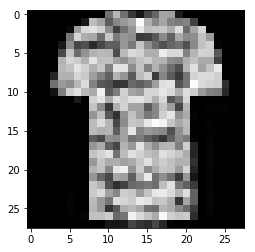

In [20]:
plt.imshow(X_train[3],cmap=plt.get_cmap('gray'))

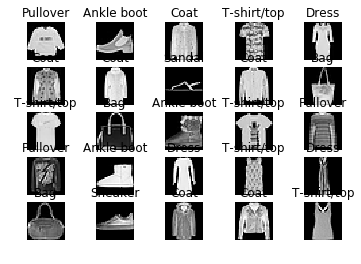

In [26]:
n = 25
for i in range(n):
  img = X_train[i]
  #print(img.shape)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  #print(x.shape)
  ret = detect.predict(x)
  #print(ret)
  plt.subplot(5, 5, i+1)
  plt.imshow(img, cmap=plt.get_cmap('gray'))
  plt.axis('off')
  bestnum = 0.0
  bestclass = 0
  for n in [0,1,2,3,4,5,6,7,8,9]:
    if bestnum < ret[0][n]:
      bestnum = ret[0][n]
      bestclass = n

  plt.title(fashion_mnist_labels[bestclass])